### Многослойная нейронная сеть на numpy

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


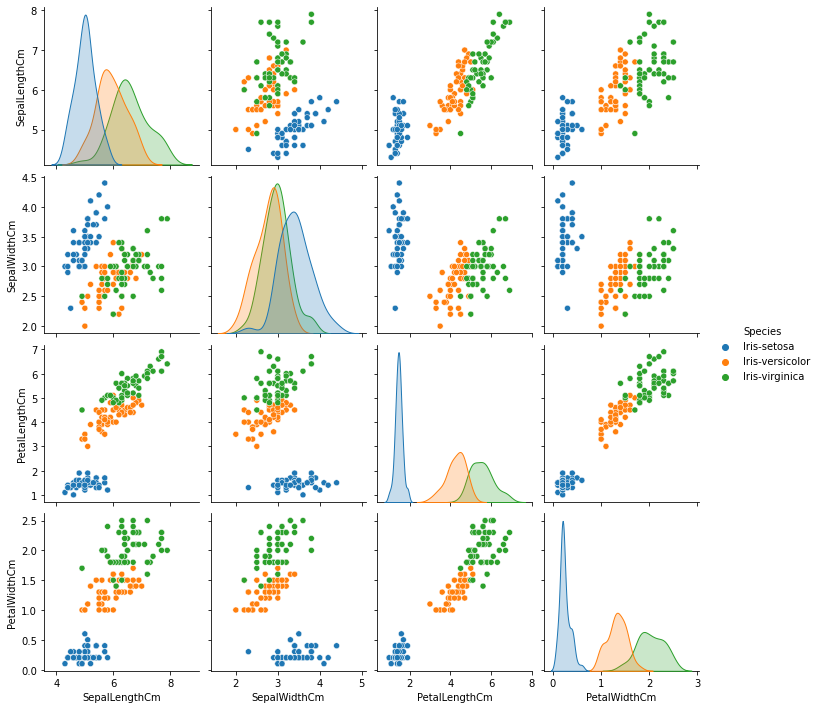

In [3]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("./Iris.csv")
print(iris_data.head()) 

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show()

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [4]:
### Шаг 3. Обученние нейронной 3х слойной сети

# определим число нейронов скрытого слоя
neuron_numb1 = 8
neuron_numb2 = 5

# присваевание случайных весов
w0 = 2*np.random.random((4, neuron_numb1)) - 1 # для входного слоя   - 4 входа, 5 выходов
w1 = 2*np.random.random((neuron_numb1, neuron_numb2)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
w2 = 2*np.random.random((neuron_numb2, 3))

# скорость обучения (learning rate)
n = 0.05

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(10000): #100,000

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))
    

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer3_error = y_train - layer3
    layer3_delta = layer3_error * sigmoid_deriv(layer3)
    
    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w2 += layer2.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer3_error))
    errors.append(error)
    accuracy = (1 - error) * 100


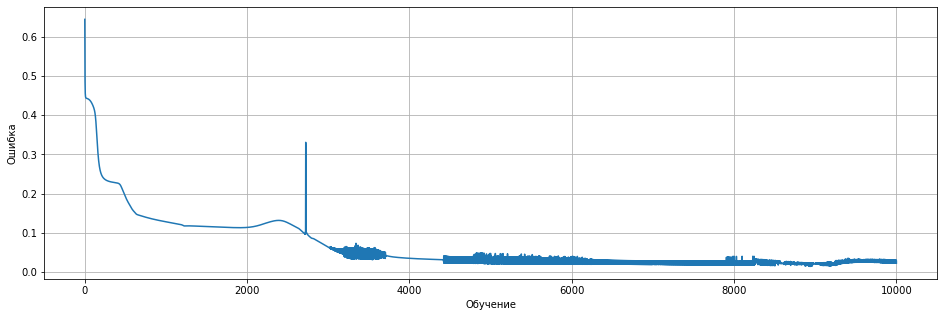

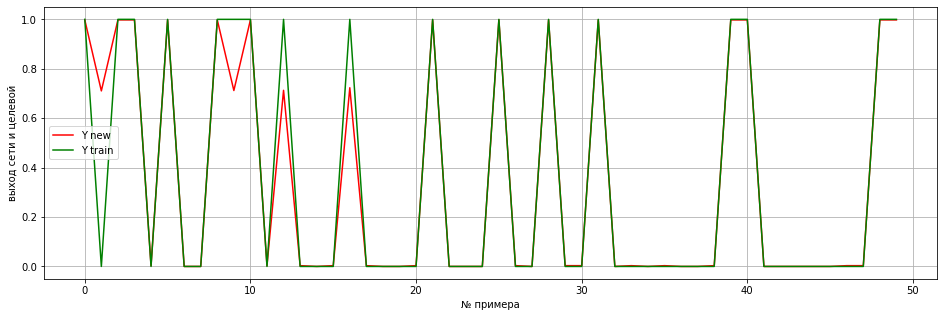

Точность нейронной сети 97.78%


In [5]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.show() 
     
N = 50
plt.figure(figsize = (16, 5))
plt.plot(layer3[:N,1], 'r', label = 'Y new')
plt.plot(y_train[:N,1], 'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.grid()
plt.show()
    
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

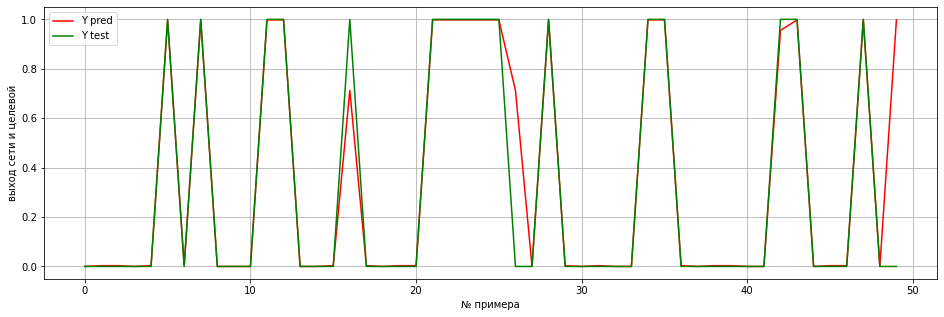

Точность нейронной сети на тестовой выборке 96.93%


In [6]:
### Шаг 5. Применение обученой нейронной сети для тестовой выборки
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer3_t = sigmoid(np.dot(layer2_t, w2))
layer3_error_t = y_test - layer3_t

N = 50
plt.figure(figsize = (16, 5))
plt.plot(layer3_t[:N,1], 'r', label = 'Y pred')
plt.plot(y_test[:N,1], 'g', label = 'Y test')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.grid()
plt.show()

error = np.mean(np.abs(layer3_error_t))
accuracy = (1 - error) * 100
print("Точность нейронной сети на тестовой выборке " + str(round(accuracy,2)) + "%")

In [7]:
### Шаг 3. Обученние нейронной 2х слойной сети

# определим число нейронов скрытого слоя
neuron_numb1 = 5

# присваевание случайных весов
w0 = 2*np.random.random((4, neuron_numb1)) - 1 # для входного слоя   - 4 входа, 5 выходов
w1 = 2*np.random.random((neuron_numb1, 3))

# скорость обучения (learning rate)
n = 0.05

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(10000): #100,000

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))  

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


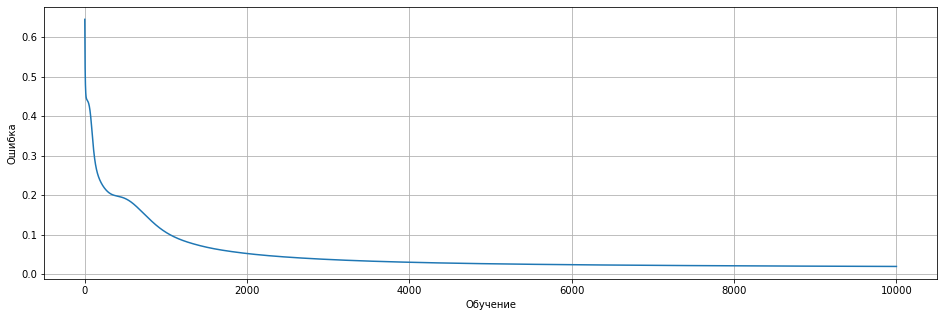

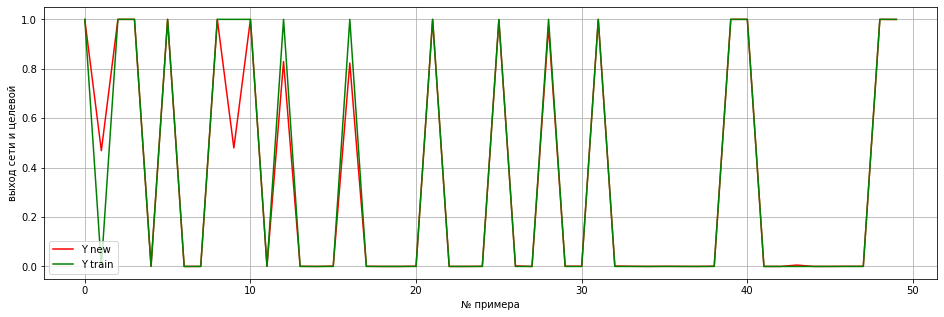

Точность нейронной сети 98.04%


In [8]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.show() 
     
N = 50
plt.figure(figsize = (16, 5))
plt.plot(layer2[:N,1], 'r', label = 'Y new')
plt.plot(y_train[:N,1], 'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.grid()
plt.show()
    
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

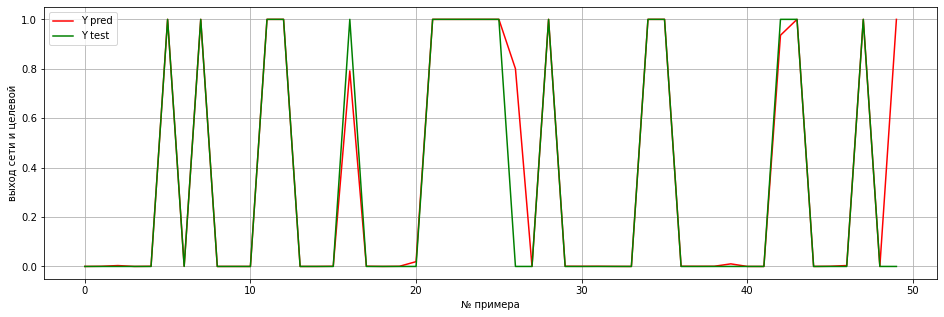

Точность нейронной сети на тестовой выборке 96.98%


In [11]:
### Шаг 5. Применение обученой нейронной сети для тестовой выборки
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t

N = 50
plt.figure(figsize = (16, 5))
plt.plot(layer2_t[:N,1], 'r', label = 'Y pred')
plt.plot(y_test[:N,1], 'g', label = 'Y test')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.grid()
plt.show()

error = np.mean(np.abs(layer2_error_t))
accuracy = (1 - error) * 100
print("Точность нейронной сети на тестовой выборке " + str(round(accuracy,2)) + "%")

### Выводы
- Увеличение количества слоев не дало значимых результатов. Для этой задачи оптимально выбор 2х слойной нейронной сети.
- Оптимальное значение нейронов скрытого слоя 2х слойной сети 5. При количестве нейронов от 2-5 наблюдается рост точности выхода, при большом значение нейронов наблюдается спад.
- Оптимальное значение скорости обучения 0.05. При более низких значениях модель не дообучается.
- С ростом количества эпох растет точность, но при более 10000 эпох рост становиться не заметен.